# Visualización

Sentido de la vista muy desarrollado. 

Gráficos son mas fáciles de interpretar. 



## Barras



In [1]:
library(tidyverse)

trips <- readr::read_csv("../tablas/bike data/201508_trip_data.csv")

trips %>% select(`Start Date`) %>% head()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  `Trip ID` = col_double(),
  Duration = col_double(),
  `Start Date` = col_character(),
  `Start Station` = col_character(),
  `Start Terminal` = col_double(),
  `End Date` = col_character(),
  `End Station` = col_character(),
  `End Terminal` = col_double(),
  `Bike #` = col_double(),
  `Subscriber Type` = col_character(),
  `Zip Code` = col_character()
)


Start Date
<chr>
8/31/2015 23:26
8/31/2015 23:11
8/31/2015 23:13
8/31/2015 23:10
8/31/2015 23:09
8/31/2015 23:07


In [46]:
trips_bici <- trips %>% select(Fecha = `Start Date`) %>% 
                        mutate(Fecha =  gsub( " .*$", "", Fecha)) %>%
                        group_by(Fecha) %>%                    
                        summarize(Viajes = n())

head(trips_bici)

Fecha,Viajes
<chr>,<int>
1/1/2015,181
1/10/2015,362
1/11/2015,327
1/12/2015,1344
1/13/2015,1368
1/14/2015,1296


In [47]:
clima <- readr::read_csv("../tablas/bike data/201508_weather_data.csv")

names(clima)

Parsed with column specification:
cols(
  .default = col_double(),
  PDT = col_character(),
  PrecipitationIn = col_character(),
  Events = col_character()
)
See spec(...) for full column specifications.


[1] "PDT"                       "Max TemperatureF"         
 [3] "Mean TemperatureF"         "Min TemperatureF"         
 [5] "Max Dew PointF"            "MeanDew PointF"           
 [7] "Min DewpointF"             "Max Humidity"             
 [9] "Mean Humidity"             "Min Humidity"             
[11] "Max Sea Level PressureIn"  "Mean Sea Level PressureIn"
[13] "Min Sea Level PressureIn"  "Max VisibilityMiles"      
[15] "Mean VisibilityMiles"      "Min VisibilityMiles"      
[17] "Max Wind SpeedMPH"         "Mean Wind SpeedMPH"       
[19] "Max Gust SpeedMPH"         "PrecipitationIn"          
[21] "CloudCover"                "Events"                   
[23] "WindDirDegrees"            "Zip"

In [48]:
clima_bicis <- clima %>% select(PDT, `Max TemperatureF`) %>% 
                            mutate(`Max TemperatureF` = round((`Max TemperatureF` - 32)*5/9, 0)) %>% 
                            rename(Fecha = PDT, Max_Temp = `Max TemperatureF`) 

head(clima_bicis)

Fecha,Max_Temp
<chr>,<dbl>
9/1/2014,28
9/2/2014,22
9/3/2014,24
9/4/2014,23
9/5/2014,22
9/6/2014,22


In [49]:
clima %>% mutate(Events = factor(Events)) %>% group_by(Events) %>% count()

Warning message:
“Factor `Events` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `Events` contains implicit NA, consider using `forcats::fct_explicit_na`”

Events,n
<fct>,<int>
Fog,73
Fog-Rain,16
Rain,195
Rain-Thunderstorm,3
NA,1538


In [50]:
clima_simple <- clima %>% replace_na(list(Events = 'Seco'))%>%
                    mutate(Events = factor(Events), 
                           Events = fct_recode(Events,
                                     'Humedo' = 'Fog', 
                                     'Humedo' = 'Fog-Rain', 
                                     'Mojado' = 'Rain', 
                                     'Mojado' = 'Rain-Thunderstorm')) 

In [51]:
clima_simple %>% select(Fecha = PDT, Events) %>% filter(Fecha == '9/17/2014') %>% head()

Fecha,Events
<chr>,<fct>
9/17/2014,Mojado
9/17/2014,Seco
9/17/2014,Seco
9/17/2014,Seco
9/17/2014,Seco


In [55]:
clima_94107 <- clima_simple %>%
                        filter(Zip == 94107) %>%
                        select(Fecha = PDT, Events, Temp = `Max TemperatureF`) %>%
                        mutate(Temp = ifelse((Temp - 32)*5/9 > 15, 'Caliente', 'Frio'))
clima_94107 %>% head()

Fecha,Events,Temp
<chr>,<fct>,<chr>
9/1/2014,Seco,Caliente
9/2/2014,Seco,Caliente
9/3/2014,Seco,Caliente
9/4/2014,Seco,Caliente
9/5/2014,Seco,Caliente
9/6/2014,Seco,Caliente


In [56]:
bicis_94107 <- left_join(clima_94107, trips_bici, by = 'Fecha')
bicis_94107 %>% filter(Events == 'Humedo') %>% head()

Fecha,Events,Temp,Viajes
<chr>,<fct>,<chr>,<int>
10/6/2014,Humedo,Caliente,1169
10/7/2014,Humedo,Caliente,1293
10/23/2014,Humedo,Caliente,1389
10/28/2014,Humedo,Caliente,1419
11/4/2014,Humedo,Caliente,1302
11/7/2014,Humedo,Caliente,1301


In [59]:
TempViajes <- bicis_94107 %>% group_by(Temp) %>% 
                                summarize(Viajes = round(mean(Viajes), 0))

data.frame(TempViajes)

Temp,Viajes
<chr>,<dbl>
Caliente,998
Frio,677


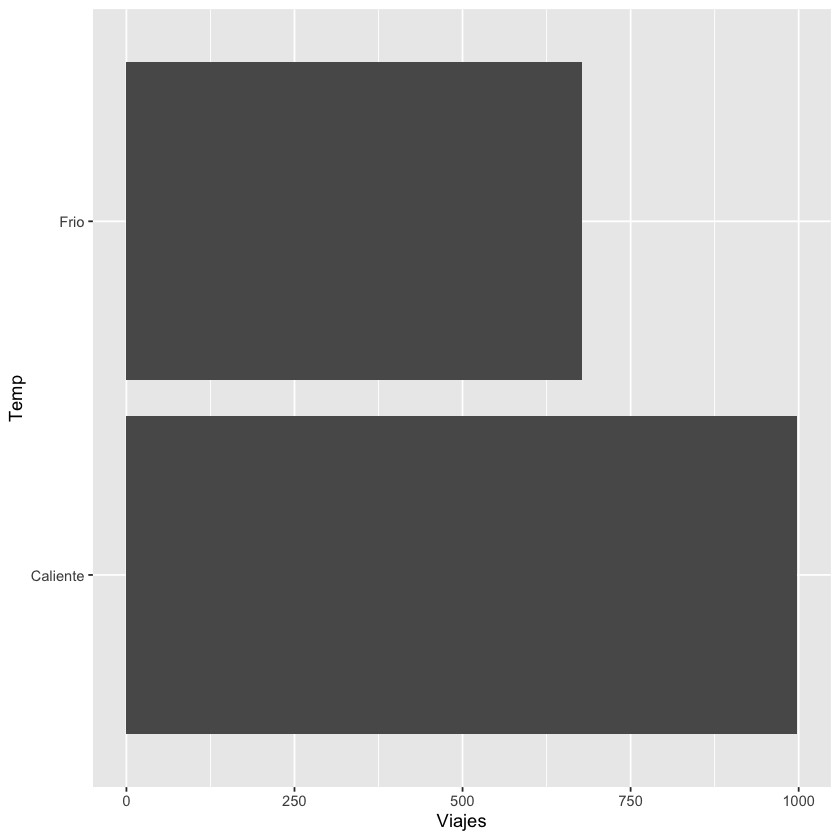

In [58]:
library(ggplot2)

# usan el fill en el aes de ggplot:
# http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization

ggplot(TempViajes, aes(y=Viajes, x=Temp)) +  
                geom_bar(stat="identity") + 
                coord_flip()

In [62]:
clima_viajes <- bicis_94107 %>% group_by(Temp, Events) %>%        
                                summarize(Viajes = round(mean(Viajes), 0)) 

head(clima_viajes)

Temp,Events,Viajes
<chr>,<fct>,<dbl>
Caliente,Humedo,908
Caliente,Mojado,907
Caliente,Seco,1025
Frio,Humedo,958
Frio,Mojado,526
Frio,Seco,618


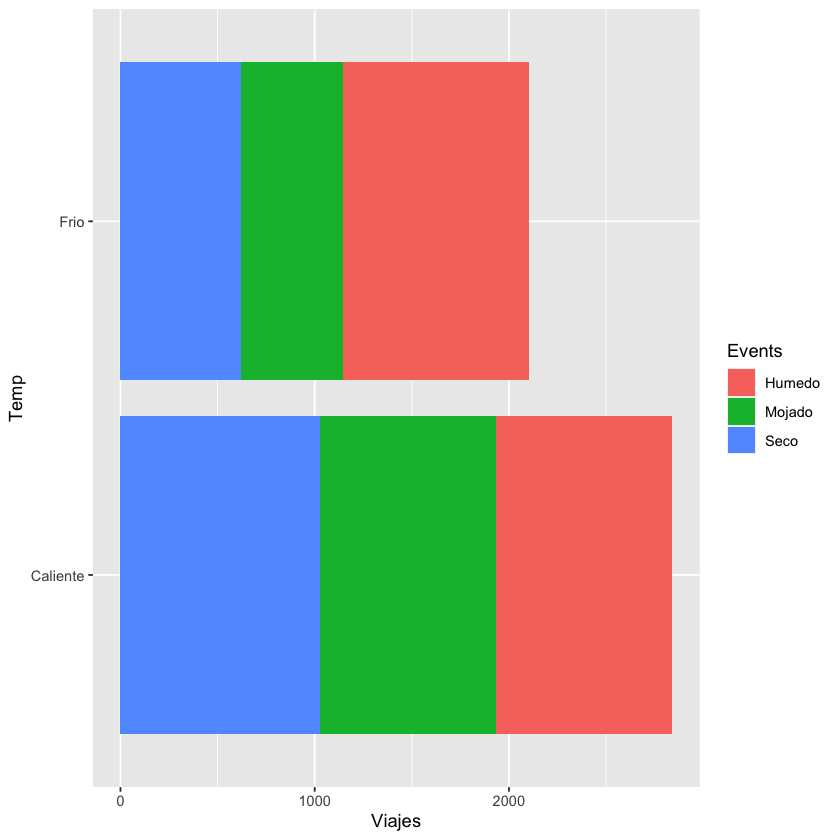

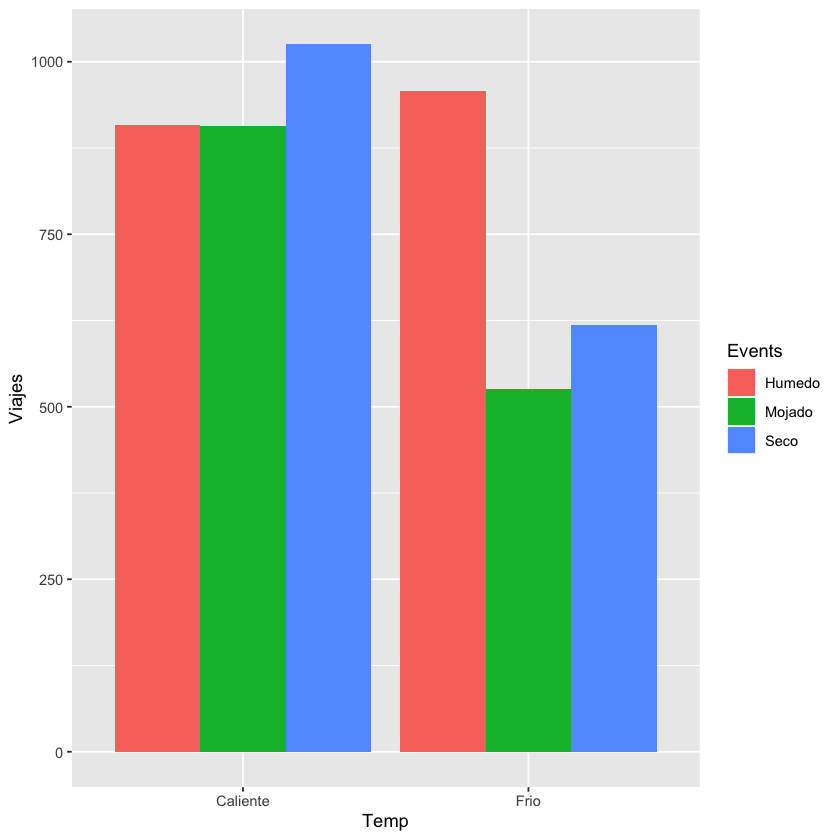

In [63]:
barP <- ggplot(clima_viajes, aes(x = Temp, y = Viajes, fill = Events)) 

barP + geom_bar(stat="identity") + coord_flip()
barP + geom_bar(stat="identity", position="dodge")

## Pricipio del área:

En un gráfico, área debe ser proporcional al valor que representa. 
    
    http://viz.wtf/post/145061464346/satisfaction-not-guaranteed
    
    http://viz.wtf/post/145813312290/big-hearted
    
    http://viz.wtf/post/151108184198/disproportionality
    
    http://viz.wtf/post/141965582857/ninety-ten-rainbow
    

# Otros bar charts



In [64]:
library(readxl)
library(dplyr)
library(ggplot2)

NobelLaureates <- read_excel("../tablas/Tables_CS109/NobelLaureates.xlsx")
head(NobelLaureates)

Country,Name,Laureate Area,Year Won,Year Won as Date,Geographic Area,Population as per 2013 (or most recent Census in Wikipedia),Laureates/10 million,Notes
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Argentina,César Milstein,Physiology or Medicine,1984,01/01/1984,South America,41446246,0.724,NA
Argentina,Adolfo Pérez Esquivel,Peace,1980,01/01/1980,South America,41446246,0.724,NA
Argentina,Luis Federico Leloir,Chemistry,1970,01/01/1970,South America,41446246,0.724,NA
Argentina,Bernardo Houssay,Physiology or Medicine,1947,01/01/1947,South America,41446246,0.724,NA
Argentina,Carlos Saavedra Lamas,Peace,1936,01/01/1936,South America,41446246,0.724,NA
Australia,Brian P. Schmidt,Physics,2011,01/01/2011,Oceania,23342553,4.712,born in the United States


In [65]:
NobelCountry <- NobelLaureates %>% select(Country) %>% group_by(Country) %>% 
                summarise(Num_Premios = n())
head(NobelCountry)

Country,Num_Premios
<chr>,<int>
Argentina,5
Australia,13
Austria,21
Azerbaijan,1
Bangladesh,1
Belarus,4


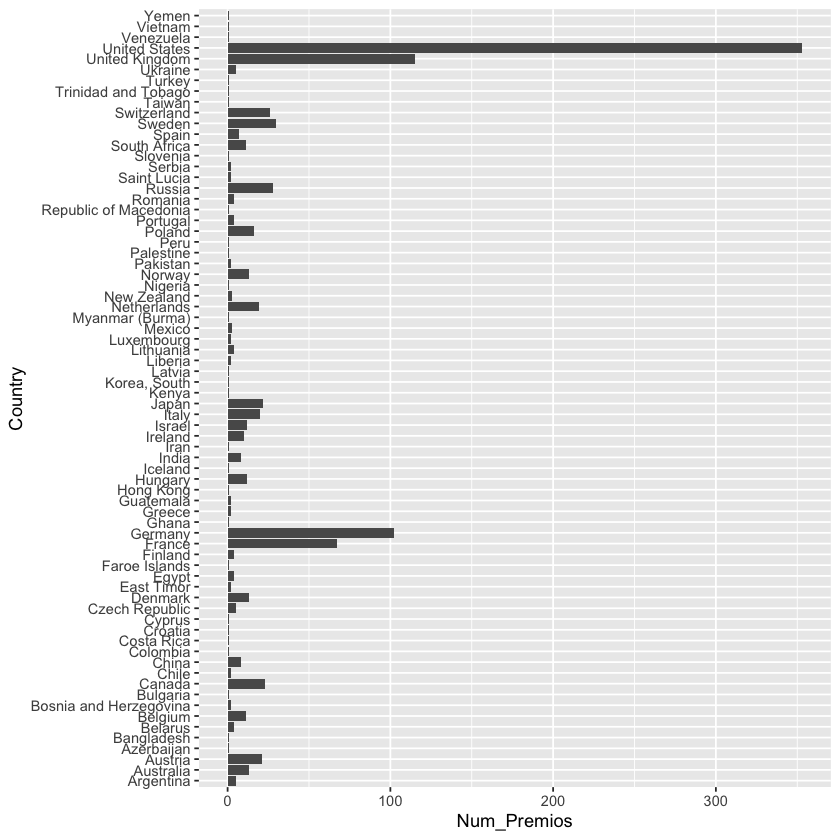

In [66]:
ggplot(NobelCountry, aes(Country, Num_Premios)) + geom_bar(stat = "identity") + coord_flip()

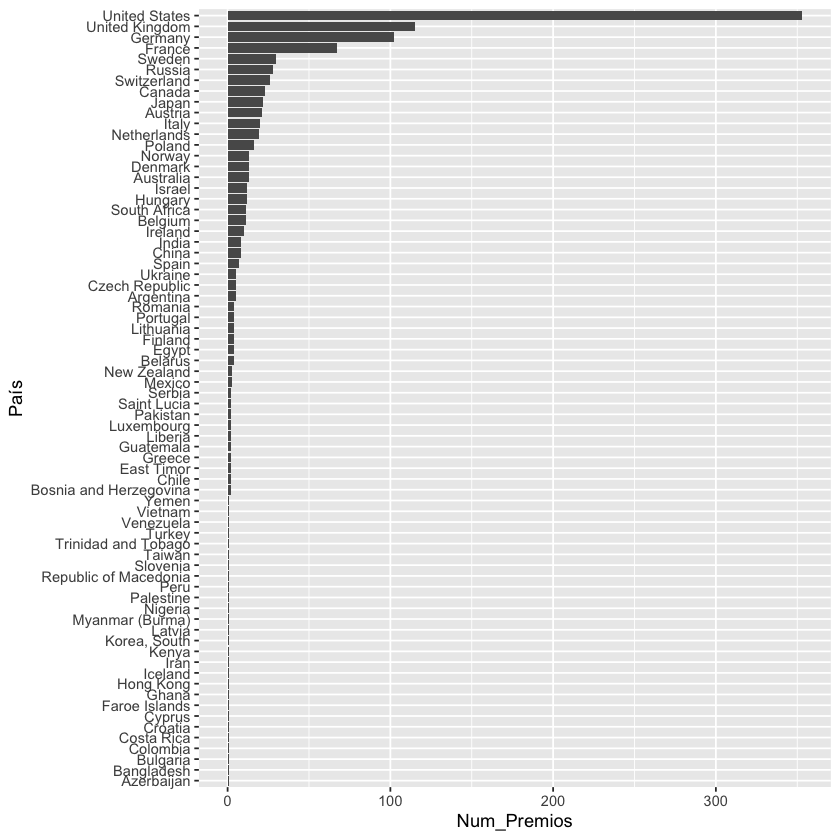

In [67]:
 ggplot(NobelCountry, aes(x = reorder(Country, +Num_Premios), y = Num_Premios)) + geom_bar(stat = "identity") + 
                coord_flip() + xlab("País") 

[1] "Country"                                                    
[2] "Name"                                                       
[3] "Laureate Area"                                              
[4] "Year Won"                                                   
[5] "Year Won as Date"                                           
[6] "Geographic Area"                                            
[7] "Population as per 2013 (or most recent Census in Wikipedia)"
[8] "Laureates/10 million"                                       
[9] "Notes"

Country,Laureate Area,Num_Premios
<chr>,<chr>,<int>
Argentina,Chemistry,1
Argentina,Physiology or Medicine,2
Australia,Chemistry,1
Australia,Physics,3
Australia,Physiology or Medicine,7
Austria,Chemistry,6


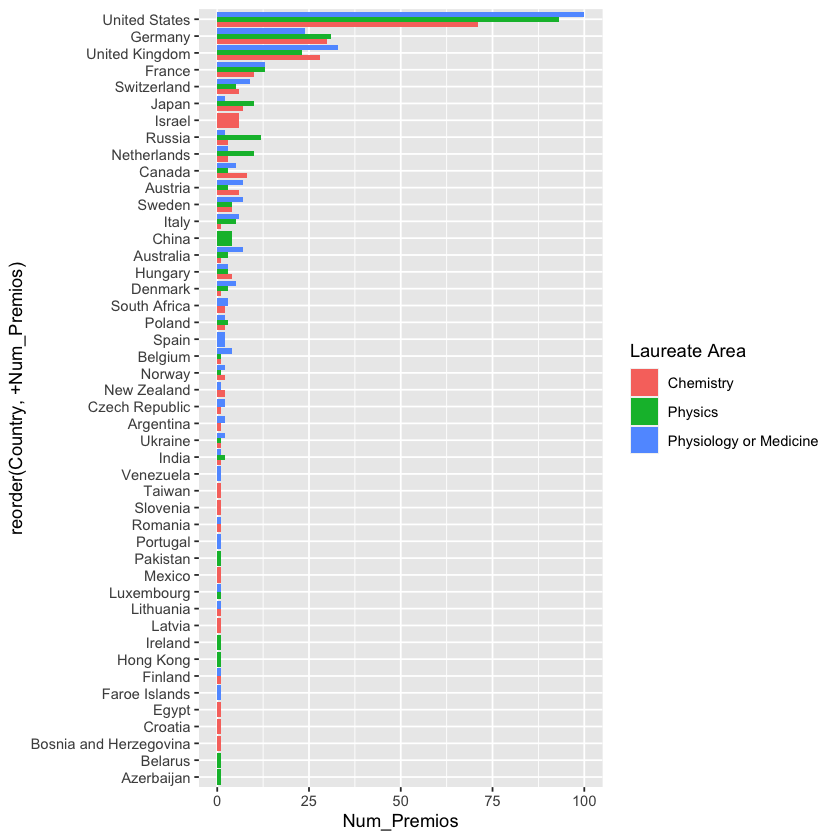

In [68]:
names(NobelLaureates)

# Use `` for spaces.

NobelCA <- NobelLaureates %>% select(Country, `Laureate Area`) %>% 
    filter(!`Laureate Area` %in% c('Economics', 'Peace', 'Literature')) %>% 
    group_by(Country, `Laureate Area`) %>% summarise(Num_Premios = n()) 

head(NobelCA)

ggplot(NobelCA, aes(x = reorder(Country, +Num_Premios), y = Num_Premios, fill=`Laureate Area`)) +
    geom_bar(stat = 'identity', position = 'dodge') + coord_flip()

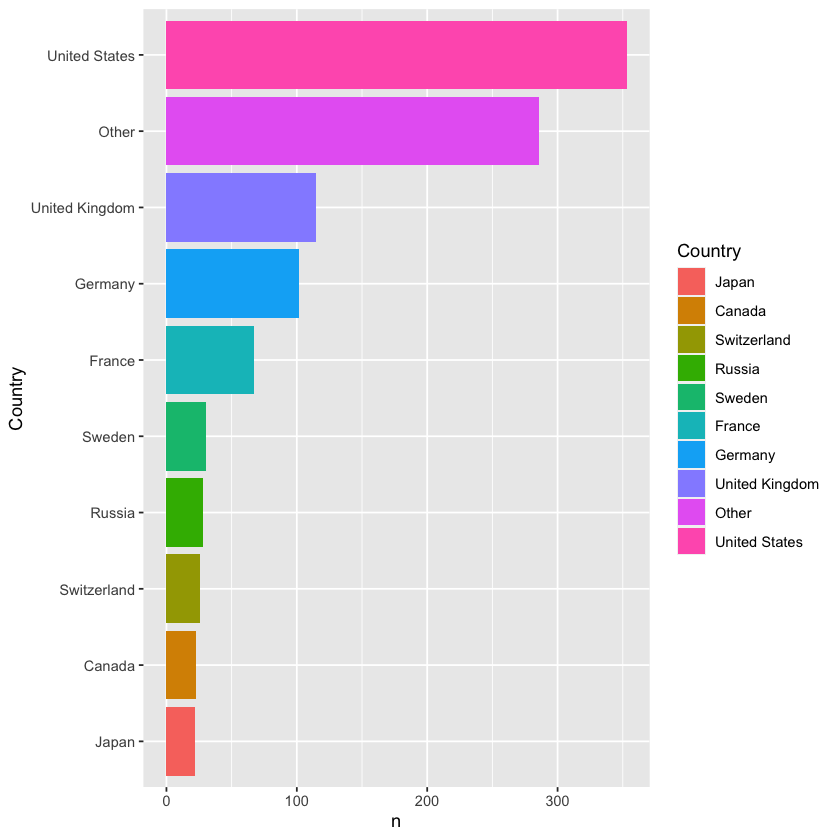

In [69]:
NobelLaureates %>% count(Country = fct_lump(Country, 9)) %>%
                    mutate(Country = fct_reorder(Country, n)) %>%
                    ggplot(aes(x = Country, y = n, fill = Country)) +
                    geom_col() +
                    coord_flip()

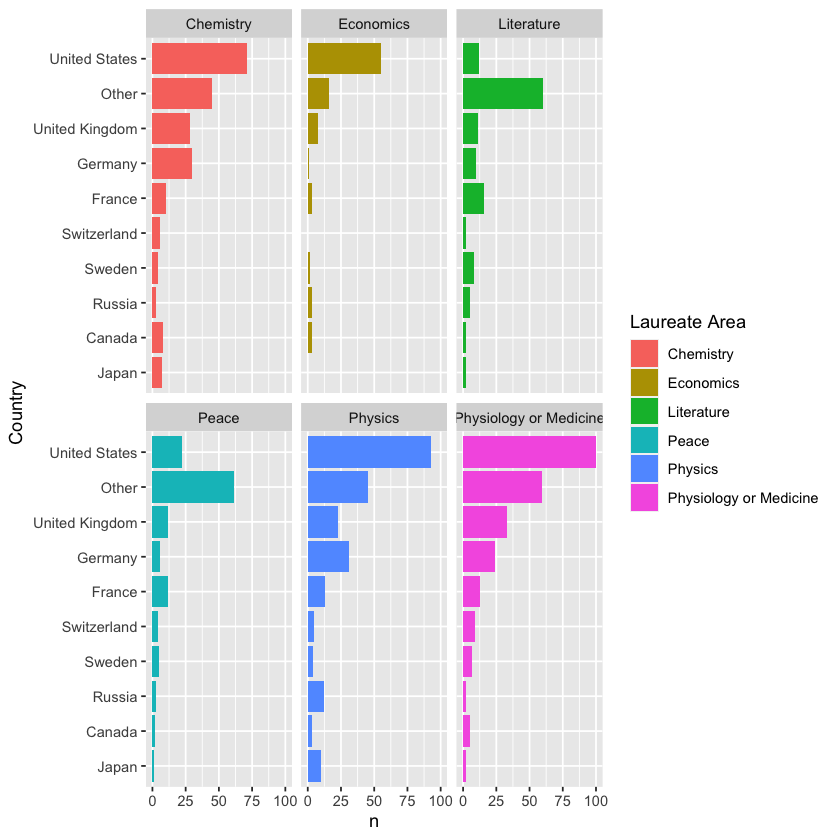

In [70]:
NobelLaureates %>% count(Country = fct_lump(Country, 9), `Laureate Area`) %>%
                    mutate(Country = fct_reorder(Country, n)) %>%
                    ggplot(aes(x = Country, y = n, fill = `Laureate Area`)) +
                    geom_col() +
                    coord_flip() +
                    facet_wrap(~`Laureate Area`)

Manipular las tablas hasta que tengan una cantidada de información razonable, luego hacer el plot.

In [71]:
NobleContinent <- NobelLaureates %>% select(Continent = `Geographic Area`) %>% 
    group_by(Continent) %>% summarize(Num.Prizes = n())

head(NobleContinent)

Continent,Num.Prizes
<chr>,<int>
Africa,13
Asia,49
Europe,559
Middle East,20
North America,379
Oceania,16


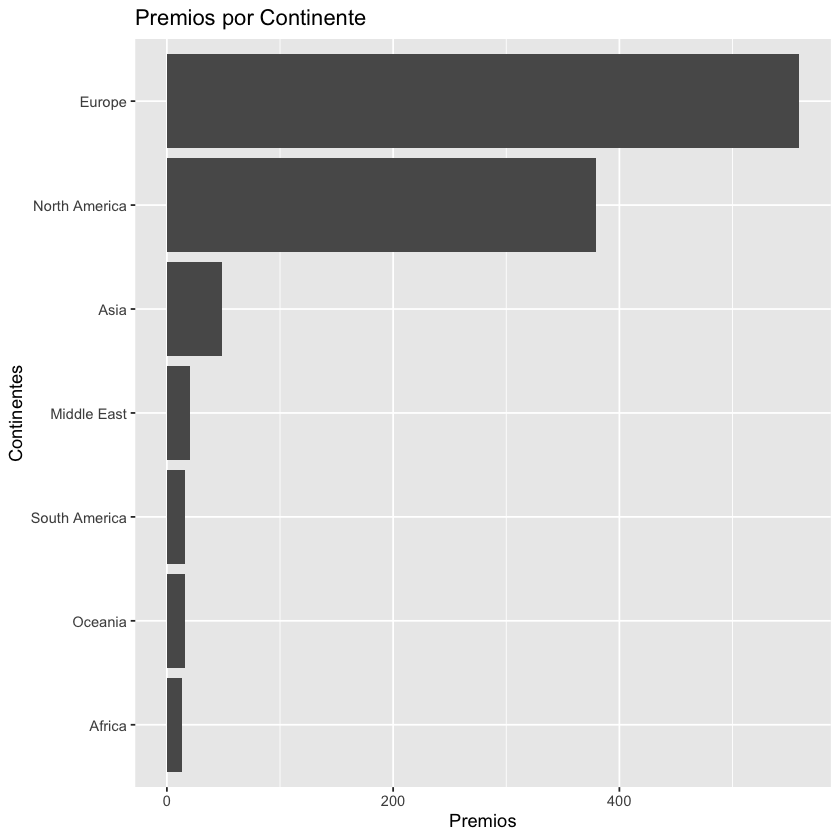

In [72]:
pContinent <- ggplot(NobleContinent, aes(x = reorder(Continent, +Num.Prizes), y = Num.Prizes))

pContinent + geom_bar(stat = "identity") + xlab("Continentes") + ylab("Premios") + 
    ggtitle("Premios por Continente") + coord_flip() 

## Otro análisis

https://www.youtube.com/watch?v=yWSpLfmES7w&t=228s

In [73]:
nobel_winners <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-14/nobel_winners.csv") %>%
                    mutate(decade = 10 * (prize_year %/% 10))

nobel_winners %>% names()

Parsed with column specification:
cols(
  prize_year = col_double(),
  category = col_character(),
  prize = col_character(),
  motivation = col_character(),
  prize_share = col_character(),
  laureate_id = col_double(),
  laureate_type = col_character(),
  full_name = col_character(),
  birth_date = col_date(format = ""),
  birth_city = col_character(),
  birth_country = col_character(),
  gender = col_character(),
  organization_name = col_character(),
  organization_city = col_character(),
  organization_country = col_character(),
  death_date = col_date(format = ""),
  death_city = col_character(),
  death_country = col_character()
)


[1] "prize_year"           "category"             "prize"               
 [4] "motivation"           "prize_share"          "laureate_id"         
 [7] "laureate_type"        "full_name"            "birth_date"          
[10] "birth_city"           "birth_country"        "gender"              
[13] "organization_name"    "organization_city"    "organization_country"
[16] "death_date"           "death_city"           "death_country"       
[19] "decade"

In [74]:
nobel_winners %>% count(category, sort = TRUE)

category,n
<chr>,<int>
Medicine,227
Physics,222
Chemistry,194
Peace,130
Literature,113
Economics,83


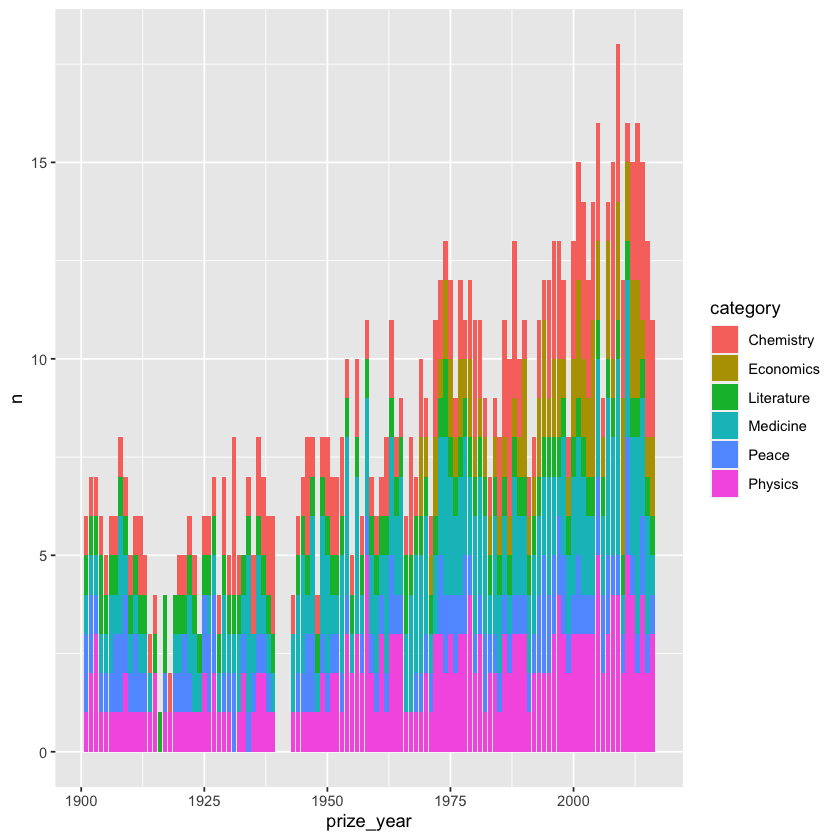

In [75]:
nobel_winners %>% count(category, prize_year, sort = TRUE) %>%
            ggplot(aes(x = prize_year, y = n, fill = category)) + 
            geom_bar(stat = 'identity')

### By decade trick

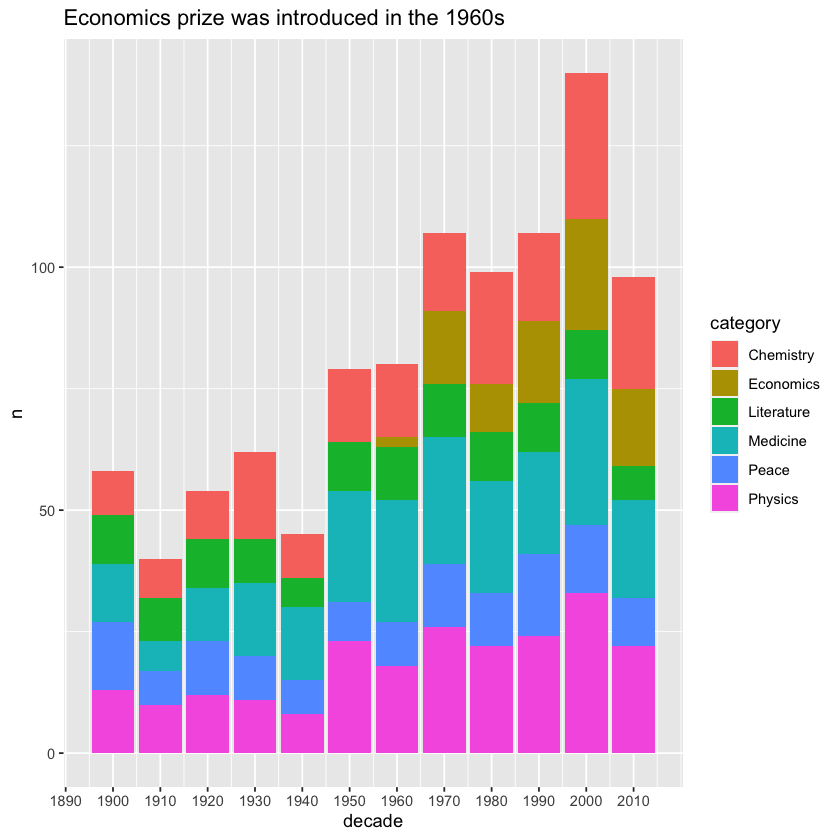

In [76]:
nobel_winners %>% 
            count(category,  decade = 10 * (prize_year %/% 10)) %>%
            ggplot(aes(x = decade, y = n, fill = category)) + 
            geom_bar(stat = 'identity') + 
            scale_x_continuous(breaks = seq(1890, 2010, 10)) +
            ggtitle('Economics prize was introduced in the 1960s')

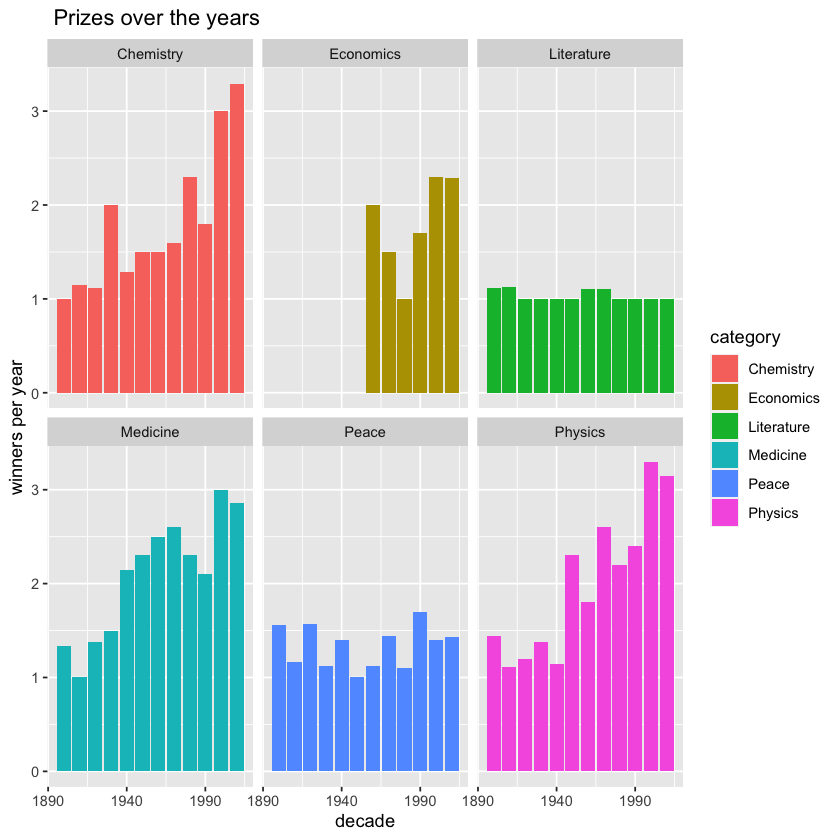

In [77]:
nobel_winners %>% 
            group_by(category,  decade = 10 * (prize_year %/% 10)) %>%
            summarise(winners = n(), 
                      `winners per year` = winners / n_distinct(prize_year)) %>%
            ggplot(aes(x = decade, y = `winners per year`, fill = category)) + 
            geom_col() +
            scale_x_continuous(breaks = seq(1890, 2010, 50)) +
            expand_limits(y = 0) +
            ggtitle(' Prizes over the years') + 
            facet_wrap(~category)

### Gender and Pizes

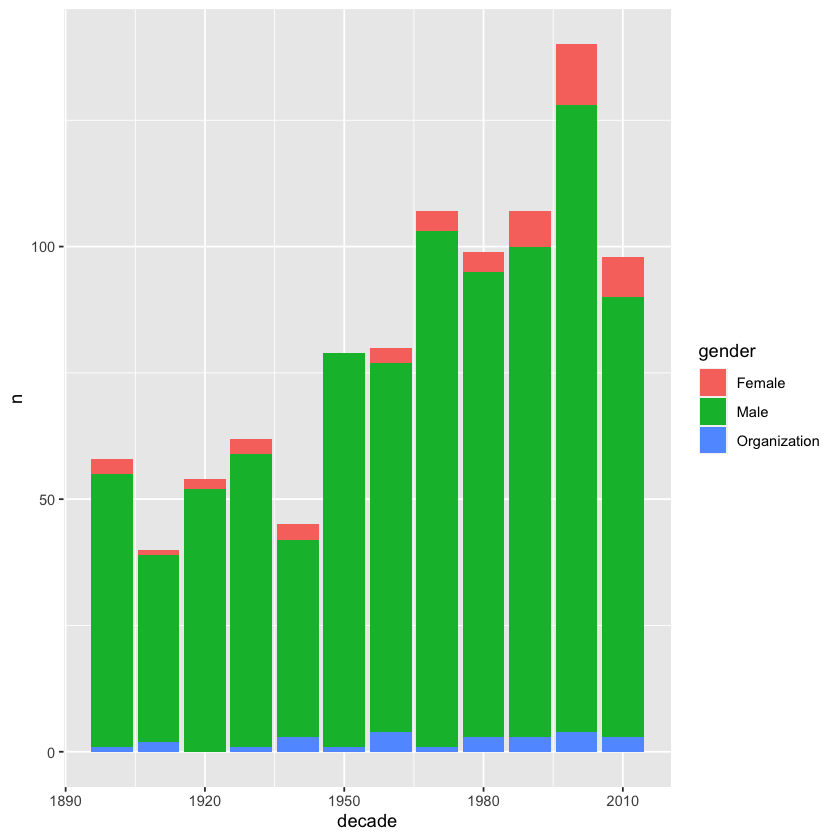

In [78]:
#coalesce: if na replace with...
nobel_winners %>% count(decade, gender = coalesce(gender, laureate_type)) %>%
                    ggplot(aes(x = decade, y = n, fill = gender)) +
                    geom_bar(stat = 'identity')

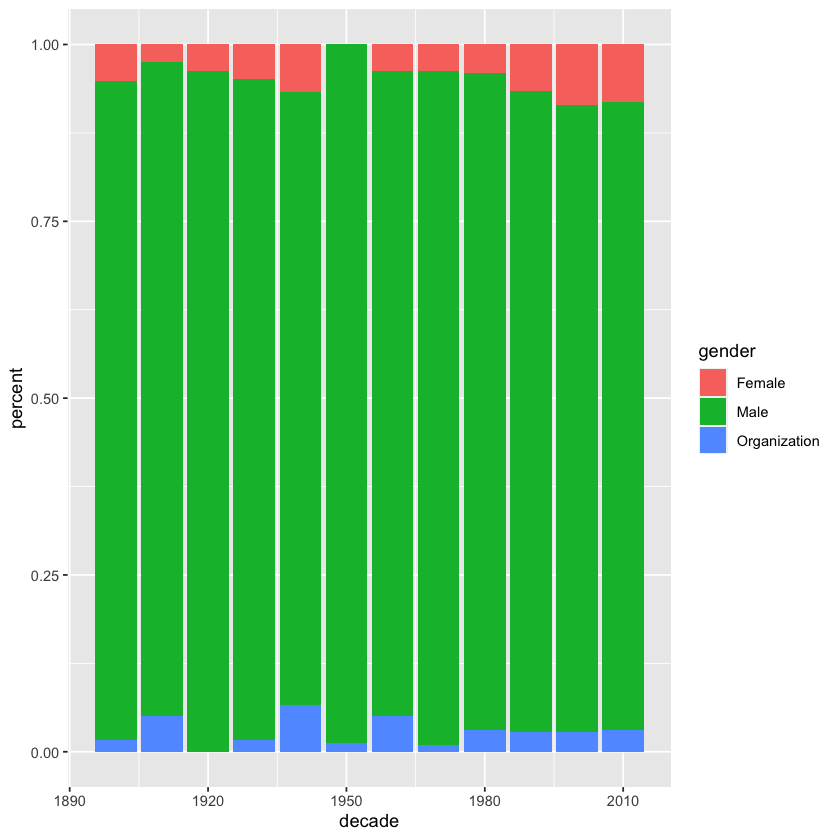

In [79]:
#coalesce: if na replace with...
nobel_winners %>% count(decade,
                        gender = coalesce(gender, laureate_type)) %>%
                    group_by(decade) %>%
                    mutate(percent = n / sum(n)) %>%
                    ggplot(aes(x = decade, y = percent, fill = gender)) +
                    geom_bar(stat = 'identity') 

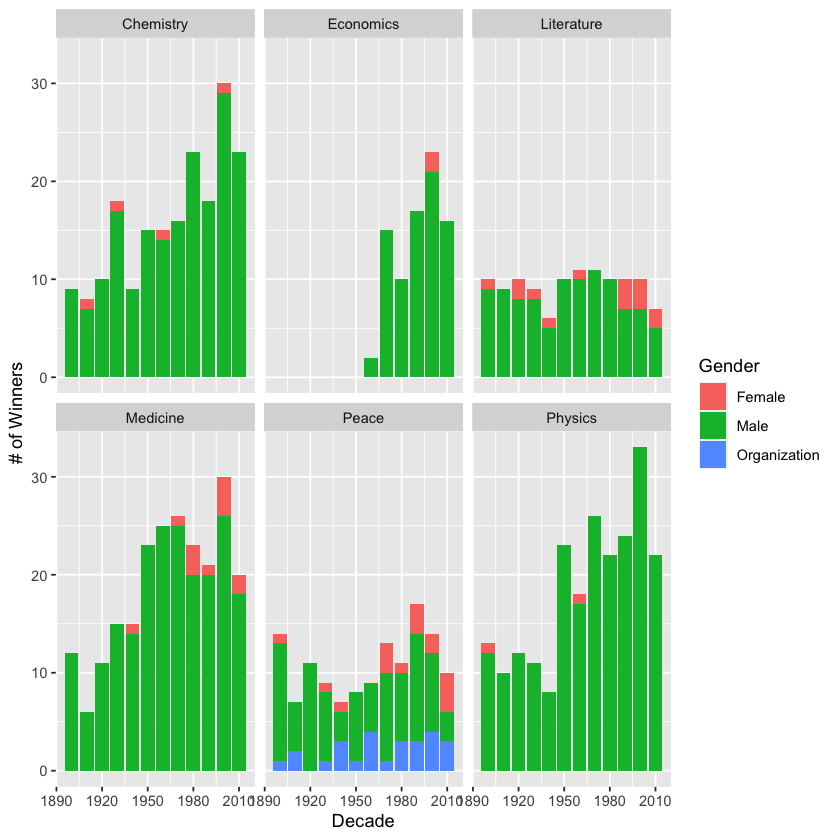

In [80]:
#coalesce: if na replace with...
nobel_winners %>% count(decade,
                        category,
                        gender = coalesce(gender, laureate_type)) %>%
                    group_by(decade, category) %>%
                    mutate(percent = n / sum(n)) %>%
                    ggplot(aes(x = decade, y = n, fill = gender)) +
                    geom_bar(stat = 'identity') +
                    facet_wrap(~category) +
                    labs(x = 'Decade', 
                         y = '# of Winners',
                         fill = 'Gender')

Warning message:
“Removed 4 rows containing missing values (position_stack).”

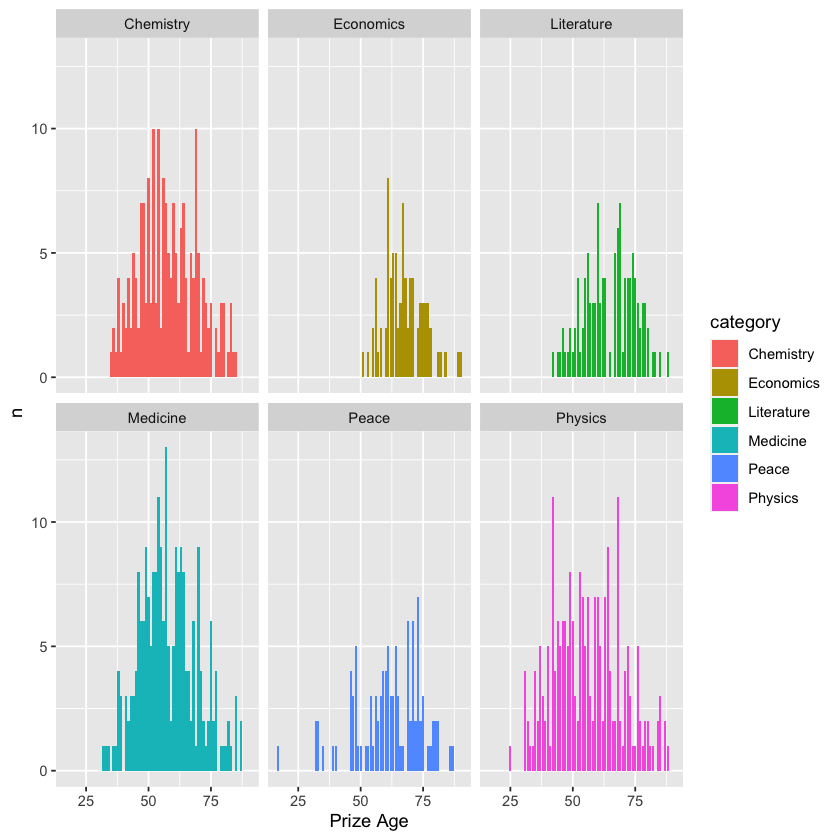

In [81]:
nobel_winners %>% mutate(`Prize Age` = prize_year - lubridate::year(birth_date)) %>%
                    count(`Prize Age`, category) %>%
                    ggplot(aes(x =  `Prize Age`, y = n, fill = category)) +
                    geom_col() + 
                    facet_wrap(~category)

Warning message:
“Removed 4 rows containing missing values (position_stack).”

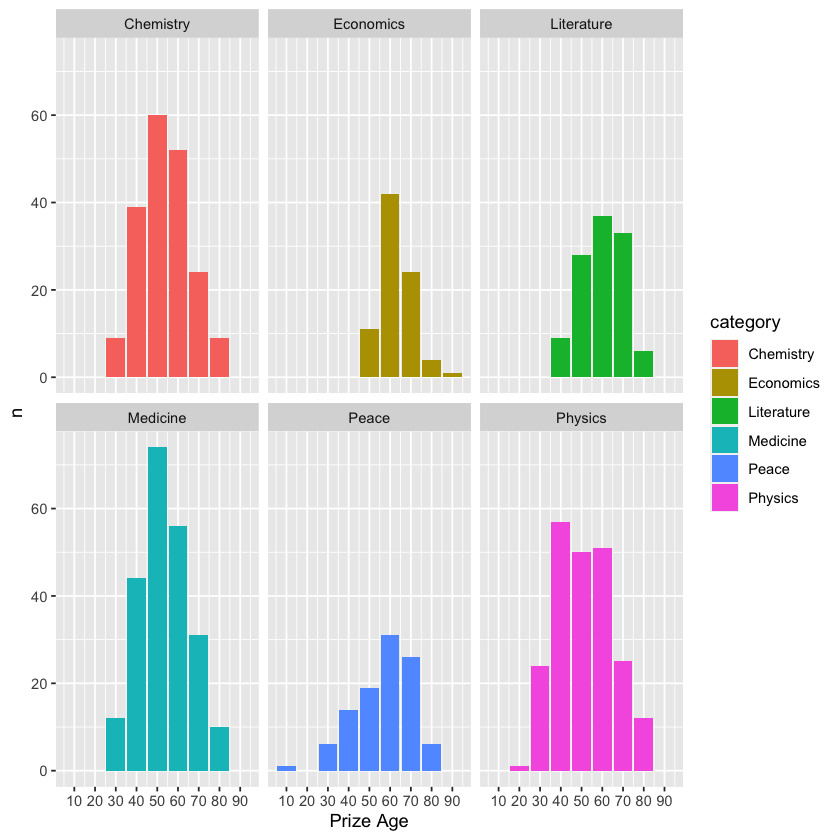

In [82]:
nobel_winners %>% mutate(`Prize Age` = 10 * (prize_year - lubridate::year(birth_date)) %/% 10) %>%
                    count(`Prize Age`, category) %>%
                    ggplot(aes(x =  `Prize Age`, y = n, fill = category)) +
                    geom_col() + 
                    facet_wrap(~category) + 
                    scale_x_continuous(breaks = seq(10, 100, 10))

In [83]:
library(WDI)
library(countrycode)
WDIsearch('gdp.*capita.*constant')

indicator,name
6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 international $)"
NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 international $)"
NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 international $)"
NY.GDP.PCAP.KN,GDP per capita (constant LCU)
NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$)


In [84]:
#https://github.com/vincentarelbundock/WDI
gdp_percapita_2016 <- WDI(indicator='NY.GDP.PCAP.KD', start = 2016, end = 2016, extra = TRUE)
gdp_percapita_2016 %>% head()

levels(gdp_percapita_2016$income)

,iso2c,country,NY.GDP.PCAP.KD,year,iso3c,region,capital,longitude,latitude,income,lending
,<chr>,<chr>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1A,Arab World,6515.611,2016,ARB,Aggregates,,,,Aggregates,Aggregates
2,1W,World,10473.746,2016,WLD,Aggregates,,,,Aggregates,Aggregates
3,4E,East Asia & Pacific (excluding high income),5795.442,2016,EAP,Aggregates,,,,Aggregates,Aggregates
4,7E,Europe & Central Asia (excluding high income),9023.105,2016,ECA,Aggregates,,,,Aggregates,Aggregates
5,8S,South Asia,1695.828,2016,SAS,Aggregates,,,,Aggregates,Aggregates
6,AD,Andorra,42949.666,2016,AND,Europe & Central Asia,Andorra la Vella,1.5218,42.5075,High income,Not classified


[1] "Aggregates"          "High income"         "Low income"         
[4] "Lower middle income" "Upper middle income"

Warning message in countrycode(birth_country, "country.name", "iso2c"):
“Some values were not matched unambiguously: Austria-Hungary (Austria), Austria-Hungary (Hungary), Austrian Empire (Czech Republic), Austrian Empire (Italy), British India (Bangladesh), British Mandate of Palestine (Israel), British Protectorate of Palestine (Israel), East Friesland (Germany), Faroe Islands (Denmark), Germany (France), Germany (Poland), Germany (Russia), Hungary (Slovakia), India (Pakistan), Northern Ireland, Poland (Belarus), Poland (Lithuania), Poland (Ukraine), Russian Empire (Azerbaijan), Russian Empire (Belarus), Russian Empire (Finland), Russian Empire (Latvia), Russian Empire (Lithuania), Russian Empire (Poland), Russian Empire (Ukraine), Scotland, Union of Soviet Socialist Republics (Belarus)
”Warning message in countrycode(birth_country, "country.name", "iso2c"):
“Some strings were matched more than once, and therefore set to <NA> in the result: Austrian Empire (Czech Republic),AT,CZ; Aust

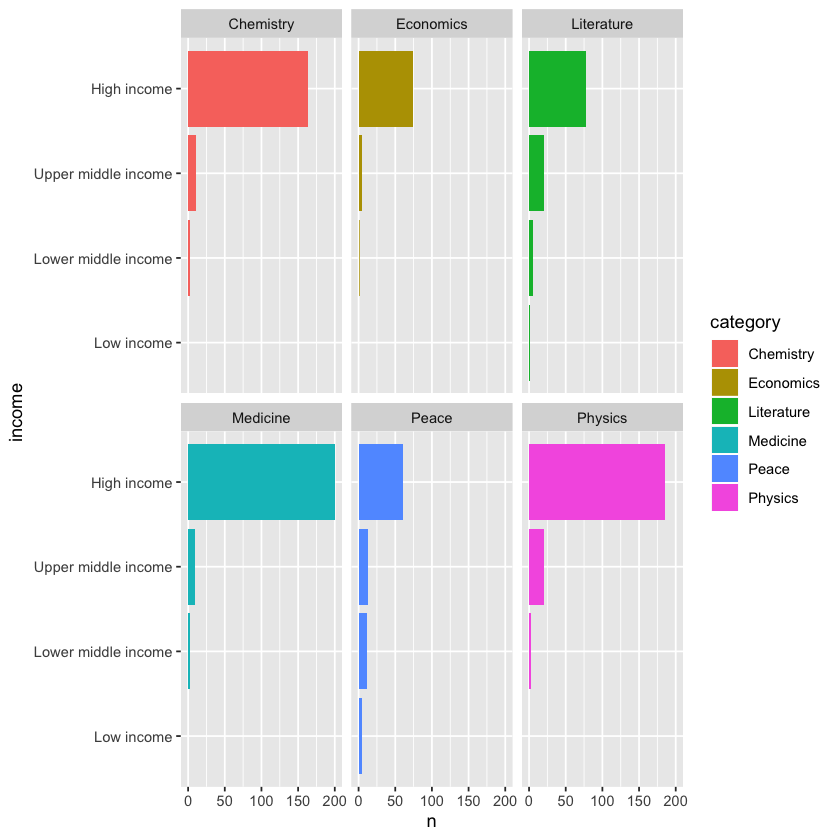

In [138]:
nobel_winners %>% 
        mutate(iso2c = countrycode(birth_country, 'country.name', 'iso2c')) %>%
        inner_join(gdp_percapita_2016 %>% select(iso2c, income), by = "iso2c") %>%
        count(income, category) %>%
        filter(!is.na(income)) %>%
        mutate(income = fct_relevel(income, c('Low income', 'Lower middle income', 
                                              'Upper middle income', 'High Income', 'Aggregates'))) %>%
        ggplot(aes(x = income, y = n, fill = category)) +
        geom_col() + 
        coord_flip() +
        facet_wrap(~category)